In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
data=pd.read_csv("cleaned_data.csv")

In [6]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C = 1.0, 
                              class_weight = None, 
                              dual = False, 
                              fit_intercept = True,
                             intercept_scaling = 1,
                             max_iter = 100,
                             multi_class = 'auto',
                             n_jobs = None,
                             penalty = 'l2',
                             random_state = None,
                             solver = 'warn',
                             tol = 0.0001,
                             verbose = 0,
                             warm_start = False)

In [7]:
lr_model.C = 0.1
lr_model.solver = 'liblinear'
lr_model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
X = data['LIMIT_BAL'][0:10].values.reshape(-1,1)
X

array([[ 20000],
       [120000],
       [ 90000],
       [ 50000],
       [ 50000],
       [ 50000],
       [500000],
       [100000],
       [140000],
       [ 20000]], dtype=int64)

In [10]:
y = data['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
lr_model.fit(X, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
new_X = data['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [13]:
lr_model.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
data['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [15]:
np.random.seed(seed = 1)

X = np.random.uniform(low = 0.0, high = 10.0, size = (1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [16]:
np.random.seed(seed = 1)

slope = 0.25
intercept = -1.25

y = slope * X + np.random.normal(loc = 0.0, scale = 1, size = (1000,)) + intercept

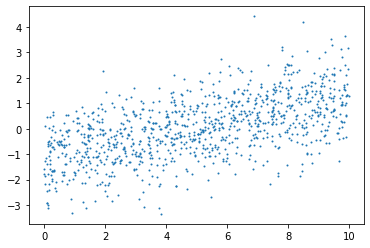

In [17]:
plt.scatter(X, y, s = 1)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['LIMIT_BAL'].values.reshape(-1,1), data['default payment next month'].values, test_size = 0.2, random_state = 24)

In [23]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(21331, 1) (21331,) (5333, 1) (5333,)


In [24]:
print(np.mean(y_train), np.mean(y_test))


0.223102526838873 0.21657603600225014


In [25]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [27]:
from sklearn.linear_model import LogisticRegression
example_lr.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = example_lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [30]:
print(example_lr.score(X_test, y_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


0.7834239639977498
0.7834239639977498


In [31]:
P = sum(y_test)
P

1155

In [32]:
TP = sum( (y_test==1) & (y_pred==1) ) # Calculating True Positives
print(TP)

TPR = TP/P # Calculating True Positive Rate
print(TPR)

0
0.0


In [33]:
FN = sum((y_test == 1) & (y_pred == 0))
print(FN)

FNR = FN/P
print(FNR)

1155
1.0


In [34]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [35]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [36]:
prob_sum = np.sum(y_pred_proba, 1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [37]:
prob_sum.shape

(5333,)

In [38]:
np.unique(prob_sum)

array([1.])

In [39]:
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [129]:
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
metrics.roc_auc_score(y_test, y_pred_proba[:,1])

0.617778144068673

In [44]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
print(fpr, tpr, thresholds)

[0.         0.01244615 0.06390618 0.10818573 0.11393011 0.2209191
 0.24629009 0.2663954  0.32048827 0.3382001  0.36955481 0.38942078
 0.41168023 0.43752992 0.46146482 0.50335089 0.52752513 0.5454763
 0.57946386 0.58784107 0.64121589 0.66850168 0.68597415 0.71325993
 0.73719483 0.74892293 0.7673528  0.77692676 0.79104835 0.8025371
 0.82431786 0.83389181 0.84657731 0.85495452 0.86213499 0.87170895
 0.90234562 0.90641455 0.91191958 0.92053614 0.9305888  0.93322164
 0.93992341 0.94375299 0.94614648 0.95213021 0.95595979 0.95931067
 0.96242221 0.96553375 0.99258018 0.99305888 0.99377693 0.99377693
 0.99401628 0.99473432 0.99521302 0.99593107 0.99688846 0.99736716
 0.99832456 0.99880326 0.9995213  0.99976065 1.        ] [0.         0.03376623 0.13852814 0.22337662 0.23809524 0.36709957
 0.4008658  0.42597403 0.47619048 0.49350649 0.53766234 0.55411255
 0.58441558 0.60952381 0.63549784 0.67359307 0.69350649 0.7038961
 0.73766234 0.74112554 0.79047619 0.80692641 0.82077922 0.83809524
 0.858008

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
data['EDUCATION'].values.reshape(-1,1), data['default payment next month'].values,
test_size=0.2, random_state=24)

In [133]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [45]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, 
                                intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=None, 
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)

In [46]:
my_lr.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred_y = example_lr.predict(X_test)

In [52]:
is_correct = y_pred_y == y_test
np.mean(is_correct)

0.7834239639977498

In [53]:
lin_reg.fit(X_train.reshape(-1,1),y_train)
print(lin_reg.intercept_)
print(lin_reg.coef_)

0.3054718560622209
[-4.91553414e-07]


In [55]:
y_pred_y.reshape(-1,1)
y_pred_y.shape

(5333,)

In [150]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
example_lr.score(X_test, y_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [143]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [144]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

In [145]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

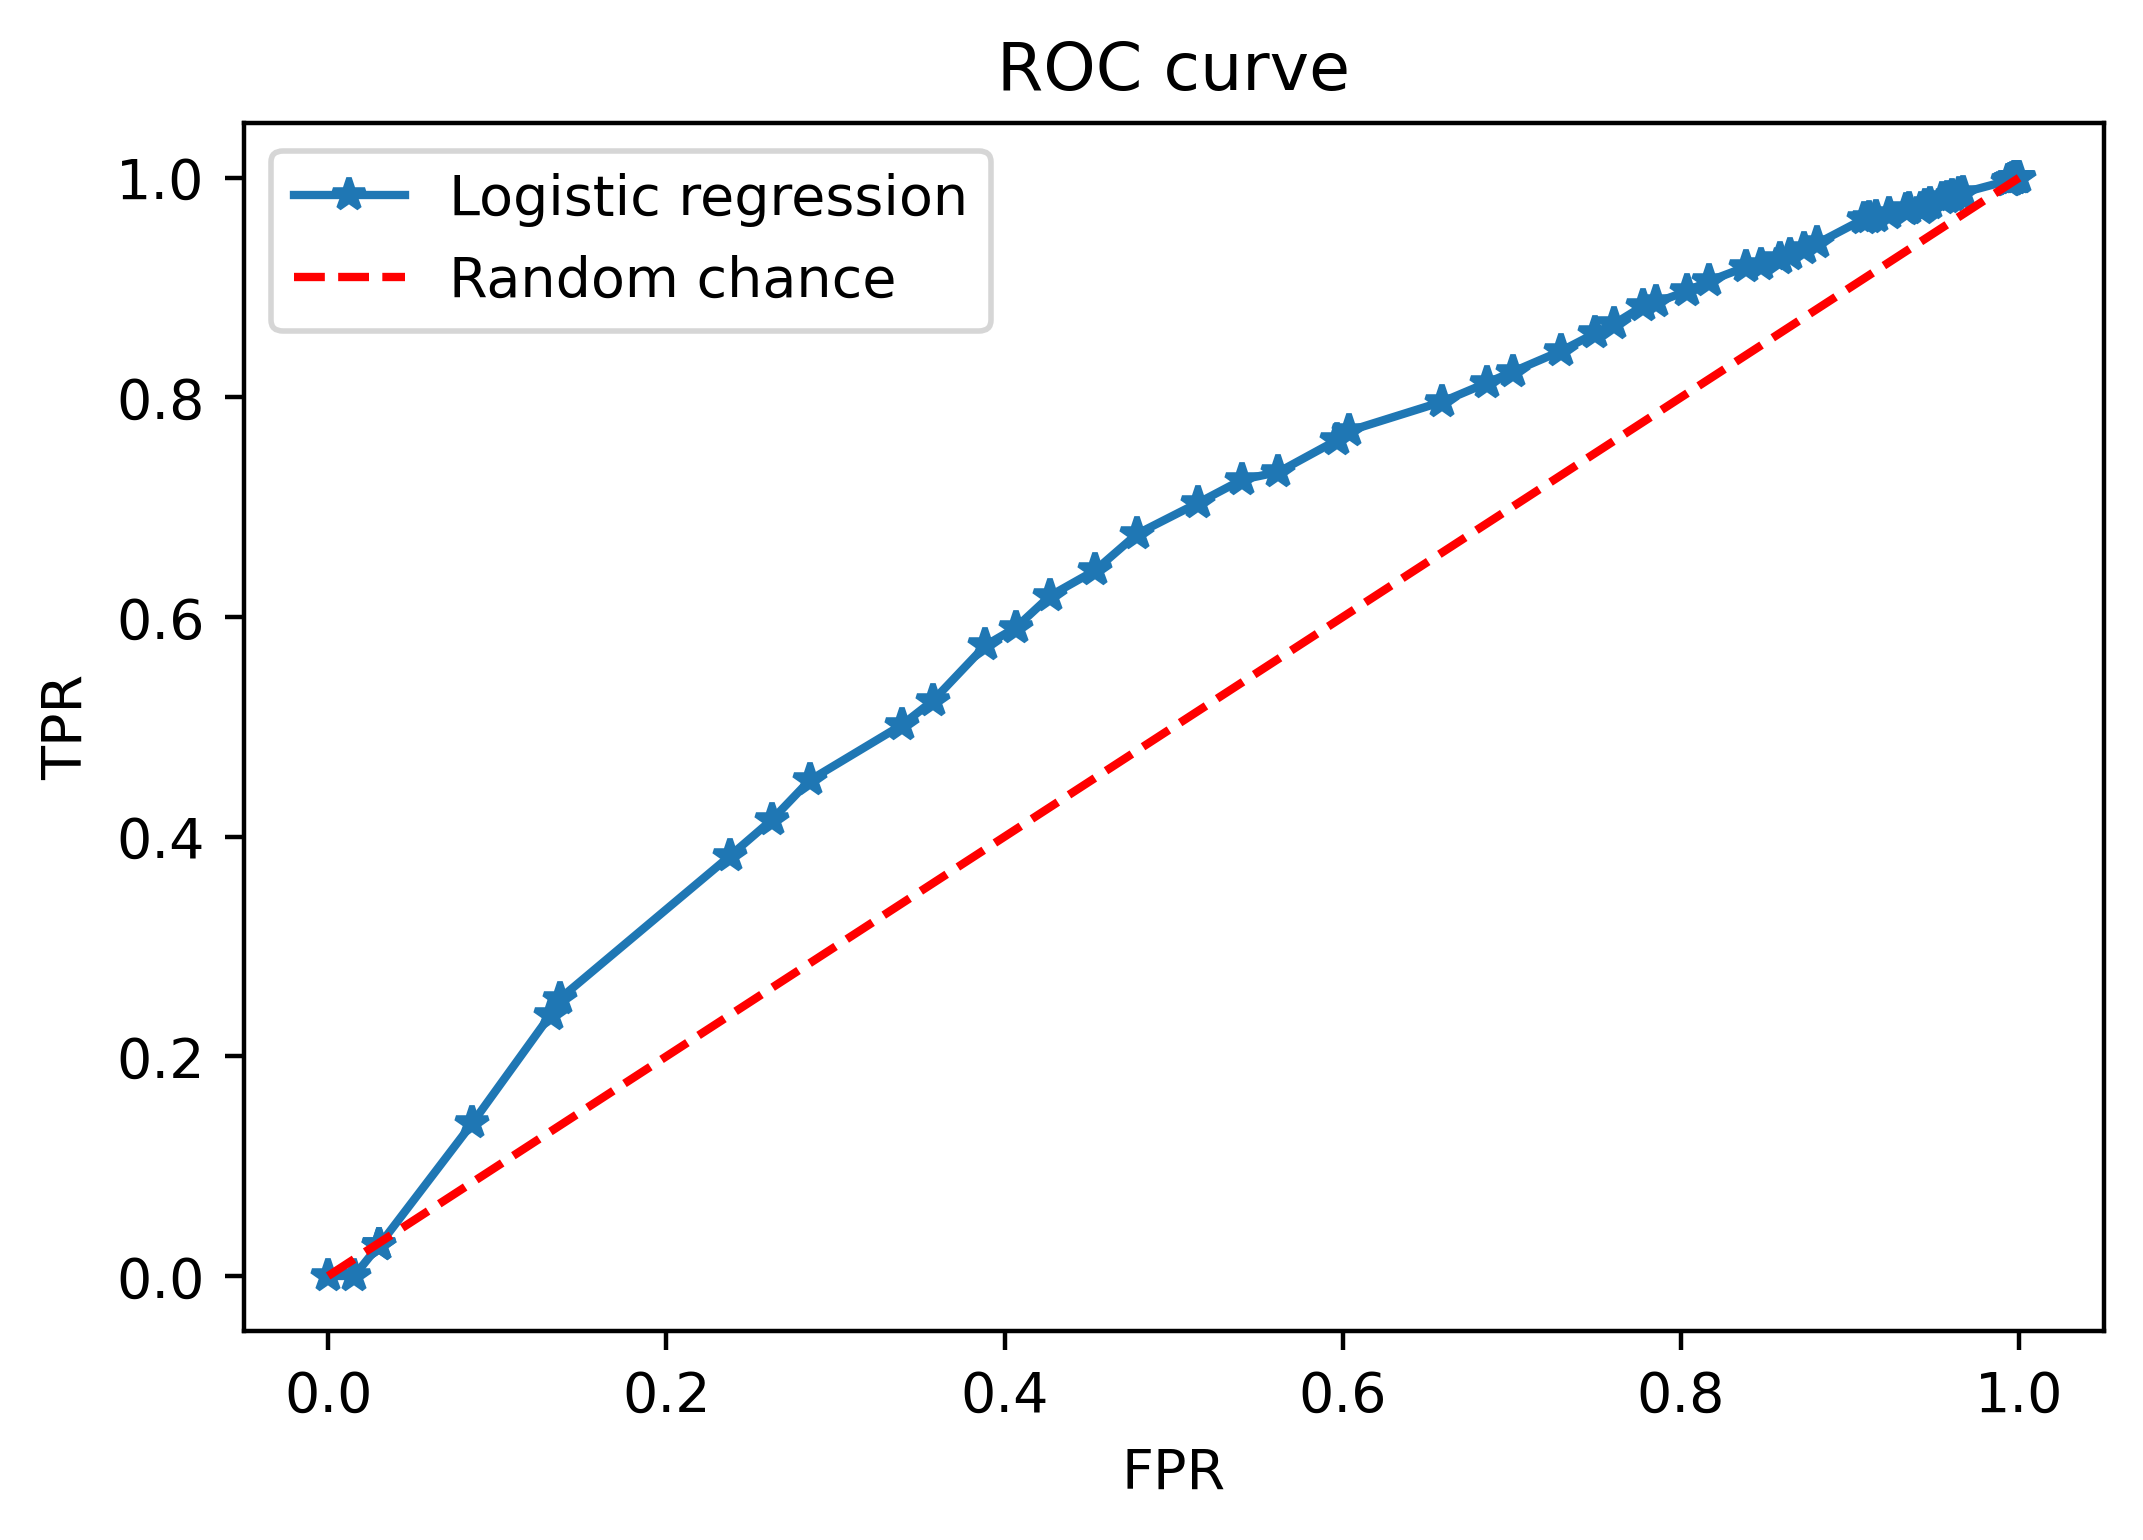

In [49]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [43]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)
print(precision, recall, thresholds)

[0.21661665 0.21651032 0.21663225 0.21667293 0.21671362 0.21687653
 0.21695807 0.21712135 0.21724398 0.21728488 0.2173258  0.21715363
 0.21719457 0.21704695 0.21716981 0.21725179 0.22033243 0.22073643
 0.22129396 0.22189753 0.22198318 0.22200354 0.22244133 0.22283792
 0.22392516 0.22441652 0.22553363 0.22670997 0.22714286 0.22761729
 0.22985832 0.2305063  0.23116659 0.231755   0.23327465 0.23466667
 0.23569638 0.23654424 0.23784926 0.23956357 0.24237288 0.24342913
 0.24518744 0.24855794 0.25020134 0.25417595 0.25845411 0.26031164
 0.26293661 0.26655574 0.27004512 0.27573253 0.27804107 0.28183716
 0.28231142 0.28683603 0.28744327 0.29115934 0.30654206 0.31032172
 0.31477357 0.36617843 0.36338028 0.37470726 0.42857143 1.        ] [1.         0.9991342  0.9991342  0.9991342  0.9991342  0.9991342
 0.9991342  0.9991342  0.9991342  0.9991342  0.9991342  0.9974026
 0.9974026  0.9965368  0.9965368  0.9965368  0.98701299 0.98614719
 0.98614719 0.98614719 0.98268398 0.97662338 0.97662338 0.97489

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


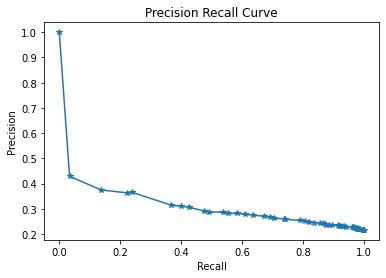

In [42]:
plt.plot(recall, precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [56]:
metrics.auc(recall, precision)


0.31566964427378624

In [65]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

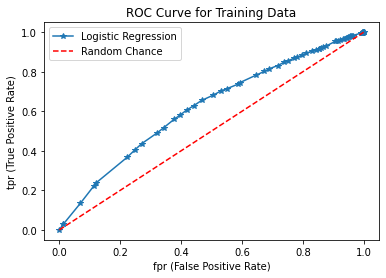

In [57]:
y_train_prob = example_lr.predict_proba(X_train)

# retriving all positiv class probabilities
train_pos_proba = y_train_prob[:,1]

# getting the required parameters
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_pos_proba)

# plotting roc-auc cuve
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression', "Random Chance"])
plt.xlabel('fpr (False Positive Rate)')
plt.ylabel('tpr (True Positive Rate)')
plt.title('ROC Curve for Training Data')
plt.show()

    How is this different, conceptually and quantitatively, from your earlier calculation?
